In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..'))
pths = [home]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')

In [2]:
from floortrans.loaders.svg_loader import FloorplanSVG
import cv2 

from floortrans.plotting import discrete_cmap
discrete_cmap()

In [3]:
room_classes = ["Background", "Outdoor", "Wall", "Kitchen", "Living Room" ,"Bed Room", "Bath", "Entry", "Railing", "Storage", "Garage", "Undefined"]
icon_classes = ["No Icon", "Window", "Door", "Closet", "Electrical Applience" ,"Toilet", "Sink", "Sauna Bench", "Fire Place", "Bathtub", "Chimney"]

data_folder = os.path.join(home, 'data/cubicasa5k/')
data_file = 'test.txt'
hdatas = FloorplanSVG(data_folder, data_file, format='txt', original_size=True)

idx = 5
hdata = hdatas.get_data(idx)
hh = hdata['house']


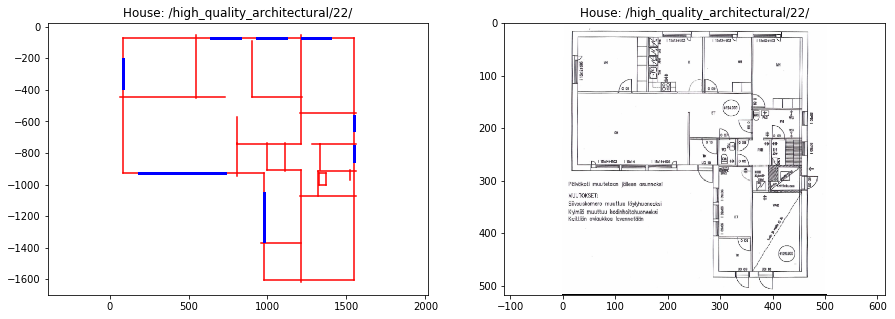

In [5]:
f, a = plt.subplots(1,2, figsize=(15, 5))
walls = hh.representation['walls']
winds = hh.representation['windows']

for x in walls:

    pts, label = x[0], x[1]

    pts = np.array(pts)
    X = pts[:, 0]
    Y = -pts[:, 1]
    a[0].plot(X, Y, 'red')
    
for x in winds:

    pts, label = x[0], x[1]

    pts = np.array(pts)
    X = pts[:, 0]
    Y = -pts[:, 1]
    a[0].plot(X, Y, 'blue', linewidth=3)

# Get image
img = hdata['image'].permute(1, 2, 0) / 255.0
a[1].imshow(img)

for _a in a:
    _a.axis('equal')
    _a.set_title('House: ' + hdata['folder'])


In [6]:
# f, a = plt.subplots(1, 1)
# rseg = a.imshow(rooms, cmap='rooms', vmin=0, vmax=n_rooms-0.1)

# # from shapely import geometry as geom 
# # poly = geom.Polygon([(_rr, -_cc) for _rr, _cc in zip(rr, cc)])
# # poly = poly.simplify(0.05, preserve_topology=True)

# a.axis('equal')
# a.axis('off')
# f.savefig('contour.png')#, frameon=False, bbox_inches='tight', pad_inches=0)

In [ ]:
from skimage.measure import approximate_polygon, find_contours

def extract_xy(p): 
    return p.T[:, 0]

def connect_xy(x, y):
    x = np.concatenate([x, [x[0]]])
    y = np.concatenate([y, [y[0]]])
    return np.array([x, y])

label = hdata['label']
label_np = label.data.cpu().numpy()
n_rooms = len(room_classes)
rooms = label_np[0]
room_classes_idx = np.unique(rooms).astype(int)
classes = [room_classes[i] for i in room_classes_idx]

_img_fpath = os.path.join(os.getcwd(), 'contour.png')
img = cv2.imread(_img_fpath, cv2.IMREAD_GRAYSCALE)
img = 255 - img

12 contours


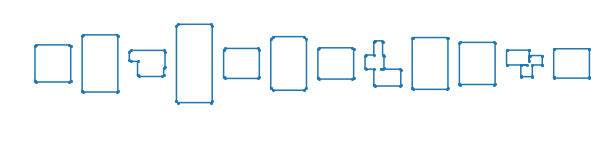

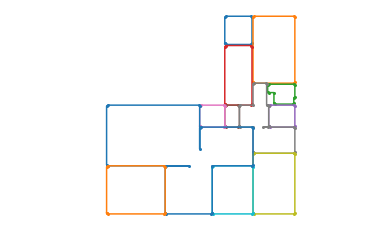

In [7]:



ret, thresh = cv2.threshold(img, 250, 255,  cv2.THRESH_BINARY)
#plt.imshow(img, cmap='gray')
#print(thresh.max())

#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
#thresh = cv2.dilate(thresh, kernel).copy()
# the '[:-1]' is used to skip the contour at the outer border of the image
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1:-1]
contours = contours[0][1:]
#contours = [contours[i][::-1][0] for i in range(len(contours))]

N = len(contours)
print(N, 'contours')
f, a = plt.subplots(1, N, figsize=(10, 2))
for i in range(N):
    contour = contours[i]
    contour = np.array(contour)
    poly = extract_xy(contour)
    poly = connect_xy(*poly)
    #poly = approximate_polygon(poly.T, tolerance=1).T

    #poly = approximate_polygon(poly.T, tolerance=1).T
    #plt.imshow(255 - img, alpha=0.5, cmap='gray')
    a[i].plot(poly[0], poly[1], marker='o', markersize=2)
    a[i].axis('equal')
    a[i].axis('off')

f, a = plt.subplots(1, 1)
for i in range(N):
    contour = contours[i]
    contour = np.array(contour)
    poly = extract_xy(contour)
    poly = connect_xy(*poly)
    #poly = approximate_polygon(poly.T, tolerance=1).T

    a.plot(poly[0], poly[1], marker='o', markersize=2)
    a.axis('equal')
    a.axis('off')